<a href="https://colab.research.google.com/github/ahmedmagdy512/MNIST-Digit-Classifier/blob/master/MNIST_DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [ ]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

11493376/11490434 [==============================] - 1s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

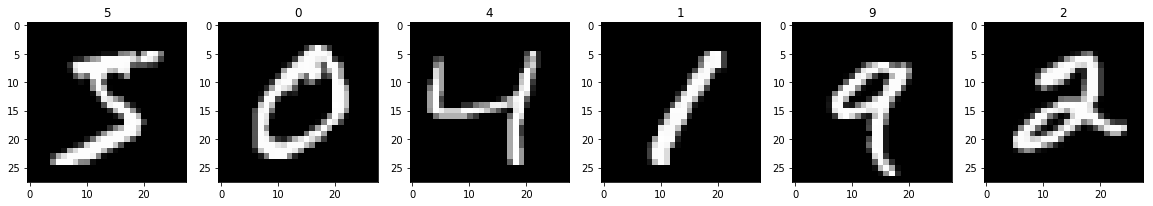

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig= plt.figure(figsize=(20,20))
for i in range (6):
  ax=fig.add_subplot(1,6,i+1)
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(y_train[i])

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
# rescale [0,255] --> [0,1]
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [ ]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

W0904 01:27:36.399577 140578591057792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 01:27:36.458742 140578591057792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 01:27:36.488483 140578591057792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 01:27:36.506914 140578591057792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0904 01:27:36.520101 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

### 7. Compile the Model

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

W0904 01:27:41.791718 140578591057792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 01:27:41.823192 140578591057792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.2400%


### 9. Train the Model

In [ ]:
from keras.callbacks import ModelCheckpoint
Checkpoint=ModelCheckpoint(verbose=1,save_best_only=True,filepath='mnist.model.best.hdf5')
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2,shuffle=True,verbose=1,callbacks=[Checkpoint])

W0904 01:27:48.842785 140578591057792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.2787 - acc: 0.9131 - val_loss: 0.1224 - val_acc: 0.9628

Epoch 00001: val_loss improved from inf to 0.12242, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.1111 - acc: 0.9661 - val_loss: 0.0931 - val_acc: 0.9722

Epoch 00002: val_loss improved from 0.12242 to 0.09313, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 8s 158us/step - loss: 0.0806 - acc: 0.9758 - val_loss: 0.0992 - val_acc: 0.9727

Epoch 00003: val_loss did not improve from 0.09313
Epoch 4/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.0625 - acc: 0.9810 - val_loss: 0.0883 - val_acc: 0.9763

Epoch 00004: val_loss improved from 0.09313 to 0.08829, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000 [==============================] - 8s 165u

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.7600%
